### Treść

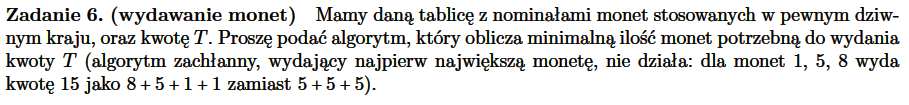

### Omówienie

Świetne wyjaśnienie obu algorytmów oraz ich złożoności:
###### LINK: https://www.youtube.com/watch?v=jgiZlGzXMBw

### Implementacja

#### Top down

In [1]:
def exchange(coins, amount):
    counts = [0] * (amount + 1)
    
    def recur(remainder):
        if remainder < 0: return -1
        if remainder == 0: return 0
        if counts[remainder]: return counts[remainder]
        
        min_count = float('inf')
        for coin in coins:
            curr_count = recur(remainder - coin)
            
            if curr_count >= 0 and curr_count < min_count:
                min_count = curr_count + 1
                
        counts[remainder] = -1 if min_count == float('inf') else min_count
        
        return counts[remainder]
        
    recur(amount)
    
    print(counts)
    
    return counts[amount]

###### Kilka testów

In [2]:
coins = [2, 5]
amount = 13
print(exchange(coins, amount))

[0, -1, 1, -1, 2, 1, 3, 2, 4, 3, 0, 4, 0, 5]
5


#### Bottom up

In [3]:
def exchange(coins, amount):
    counts = [amount + 1] * (amount + 1)
    counts[0] = 0
    
    for i in range(1, amount + 1):
        for coin in coins:
            if coin <= i:
                counts[i] = min(counts[i], counts[i - coin] + 1)
                
    print(counts)
                
    return counts[amount] if counts[amount] <= amount else -1

###### Kilka testów

In [4]:
coins = [2, 5]
amount = 2
print(exchange(coins, amount))

[0, 3, 1]
1


### (Dodatkowo) Implementacja odtwarzania wyniku

Konieczne jest stworzenie pomocniczej tablicy, w której będziemy przechowywać indeks z tablicy wykorzystywanej do wyznaczania minimalnej liczby monet, jakie są potrzebne do wydania każdej kolejnej kwoty aż do osiągnięcia kwoty docelowej, który będzie wskazywał na pole tablicy, które odpowiada pozostałej reszcie monet.

#### Bottom up

In [5]:
def exchange(C: 'array of denominations', A: 'amount to exchange'):
    F = [A + 1] * (A + 1)
    P = [-1] * (A + 1)
    F[0] = 0
    
    for i in range(1, A + 1):
        for coin in C:
            if coin <= i and F[i - coin] + 1 < F[i]:
                F[i] = F[i - coin] + 1
                # Store an index of the previous amount cell
                P[i] = i - coin
    
    # Restore the result
    if F[A] > A: return []
    
    res = [None] * F[A]
    i = A
    j = 0
    while i > 0:
        res[j] = i - P[i]
        i = P[i]
        j += 1
        
    return res

###### Kilka testów

In [6]:
coins = [2, 5]
amount = 19

coins = exchange(coins, amount)
print(f'Used {len(coins)} coins')
print(f'Coins after exchange:', coins)

Used 5 coins
Coins after exchange: [2, 2, 5, 5, 5]
